### カーネル法を用いたサポートベクタマシン（SVMとも言う）

- 線形サポートベクタマシンを拡張したもの
- クラス分類にも回帰にも利用できる

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

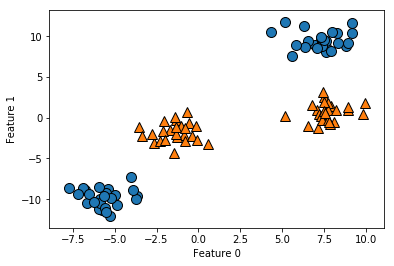

In [25]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- 線形モデルでは、直線でしか分けられないので、こうしたデータは分類できない

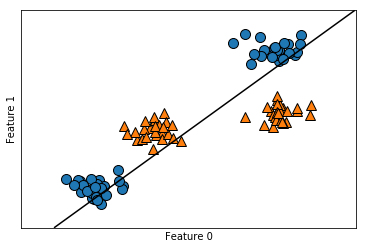

In [26]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

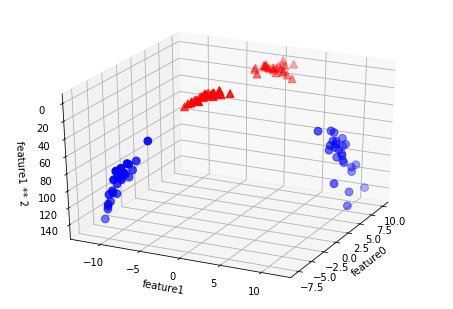

In [27]:
# 2番目の特徴量の2乗を追加
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

#3Dで可視化
ax = Axes3D(figure, elev=-152, azim=-26)

#y == 0の点をプロットしてからy == 1の点をプロット
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
          cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

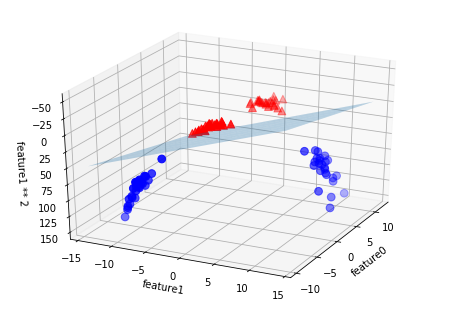

In [28]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

#線形決定境界を描画
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() -2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
          cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

- 元の特徴量の関数として見ると、楕円に近い形になっている

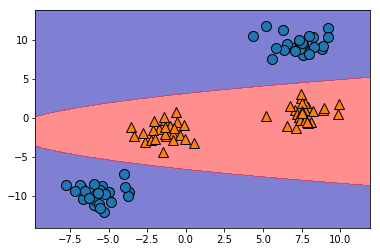

In [29]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")

### カーネルトリック

- 非線形の特徴量をデータ表現に加えると、線形モデルが強力になる
- しかし、同時に計算量も大きくなってしまう
- 高次元空間でのクラス分類器を学習させ、かつデータポイントを拡張しない巧妙な数学的トリックをカーネルトリックと言う
- サポートベクタマシンでの高次元空間マッピング
    - 多項式カーネル(polynomial kernel)
    - 放射基底関数カーネル(radial basis function: RBF)

- 訓練の過程で、SVMは個々のデータポイントが、2つのクラスの決定境界を表現するのにどの程度重要かを学習する
- クラスの境界に位置するごく一部の訓練データポイントだけが決定境界を決定する
- これらのデータポイントをサポートベクタと呼ぶ

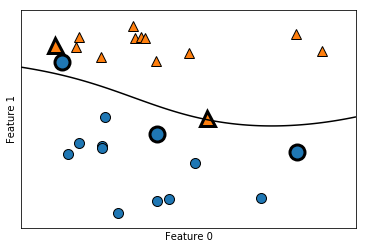

In [30]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
#サポートベクタをプロットする
sv = svm.support_vectors_
#サポートベクタのクラスラベルはdual_coef_の正負によって与えられる
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

### SVMパラメータの調整

- gammaパラメータは、サポートベクタの距離を定義しているガウシアンカーネルの幅を調整する
- 点が近いと言うことを意味するスケールを決定する
- 正則化パラメータ

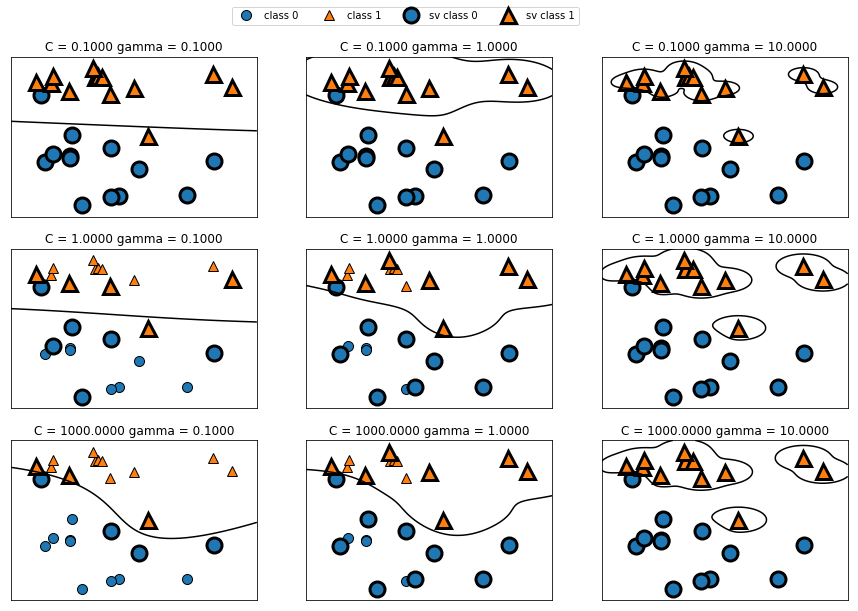

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
    
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                 ncol=4, loc=(.9, 1.2))

In [33]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on train set: {}".format(svc.score(X_train, y_train)))
print("Accuracy on train set: {}".format(svc.score(X_test, y_test)))

Accuracy on train set: 1.0
Accuracy on train set: 0.6293706293706294


- 過剰適合を起こしている

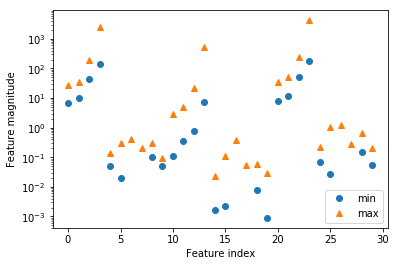

In [35]:
# 個々の特徴量の最大値と最小値を対数でプロット

plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

- データのスケールが桁違いに違う
- スケールを揃えてから学習することで精度が上がる
- SVMでよく使われるのは、全ての特徴量を0から1の間にする方法

In [36]:
# 訓練セットの特徴量ごとに最小値を計算
min_on_training = X_train.min(axis=0)
#訓練セットの特徴量ごとにレンジ（最大値 - 最小値）を計算
range_on_training = (X_train - min_on_training).max(axis=0)

# 最小値を引いてレンジで割る
# 個々の特徴量はmin=0, max=1となる
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [37]:
# テストセットに対しても、全く同じ変換を行う
X_test_scaled = (X_test - min_on_training) / range_on_training

In [41]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on train set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on train set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on train set: 0.948
Accuracy on train set: 0.951


In [42]:
# Cやgammaを増やして、より複雑なモデルにし、適合不足を解消していく
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on train set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on train set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on train set: 0.988
Accuracy on train set: 0.972


##　利点、欠点、パラメータ

- データにわずかな特徴量しかなくても、複雑な決定境界を生成することができる
- 低次元のデータでも高次元のデータでもうまく機能する
- しかし、サンプルの個数が大きくなるとうまく機能しない
- 10,000サンプルくらいまでならうまくいく。100,000までいくと、実行時やメモリ面で厳しい
- 前処理とパラメータ調整を注意深く行う必要がある
- SVMは検証が難しい。予測がなされた理由を理解するのが難しい